# Analysis of Clustering Model

This is an analysis of the patterns that
occure in our audio files.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

In [21]:
sys.path.append('..')

In [22]:
MODEL = "v3_lstm_v1"
PATH  = "../models/{}".format(MODEL)

## Prepare Base Statistics

+ Compute the distance between signals in time
+ Compute the annotations for each file
+ Assign cluster series

In [53]:
n_clusters = {}
for filename in os.listdir(PATH):
    if filename.startswith('seq_clustering_log'):
        path = "{}/{}".format(PATH, filename) 
        key  = filename.split('.')[0]
        df = pd.read_csv(path, names=["start", "stop", "cluster", "i"])
        if len(df) > 5:
            df = df.sort_values('start')
            n_clusters[key] = list([row['cluster'] for _, row in df.iterrows()])

In [54]:
n_per_session_distinct = [len(set(v)) for v in n_clusters.values()]
n_per_session          = [len(v) for v in n_clusters.values()]

num_clusters  = sum(n_per_session)
num_sessions  = len(n_clusters)
print("#sessions: {}".format(num_sessions))
print("#clusters: {}".format(num_clusters))

#sessions: 243
#clusters: 30473


## Detections

Check the amount of signals we can detect in each session

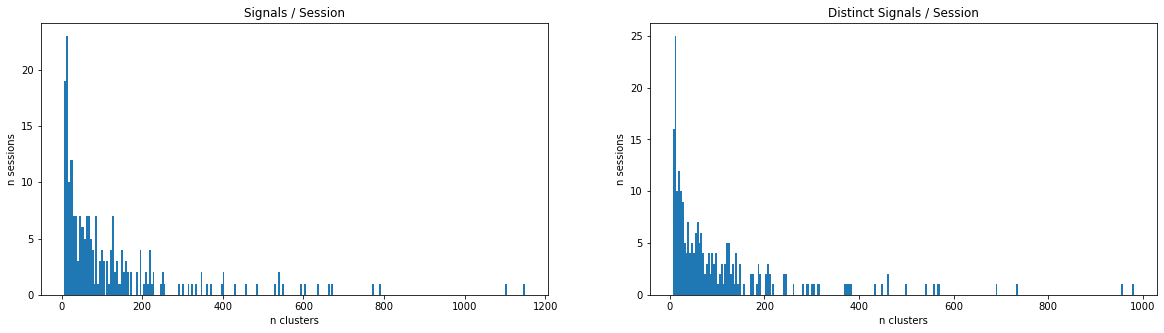

In [56]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(n_per_session, bins=250)
plt.title('Signals / Session')
plt.xlabel("n clusters")
plt.ylabel("n sessions")
plt.subplot(1, 2, 2)
plt.hist(n_per_session_distinct, bins=250)
plt.title('Distinct Signals / Session')
plt.xlabel("n clusters")
plt.ylabel("n sessions")
plt.show()

## Cluster Usage

In [60]:
clusters = {}
for k, v in n_clusters.items():
    for c in v:
        if c in clusters:
            clusters[c] += 1
        else:
            clusters[c]  = 1
clusters = sorted([(c, count) for c, count in clusters.items() if count > 3], key=lambda x: -x[1])

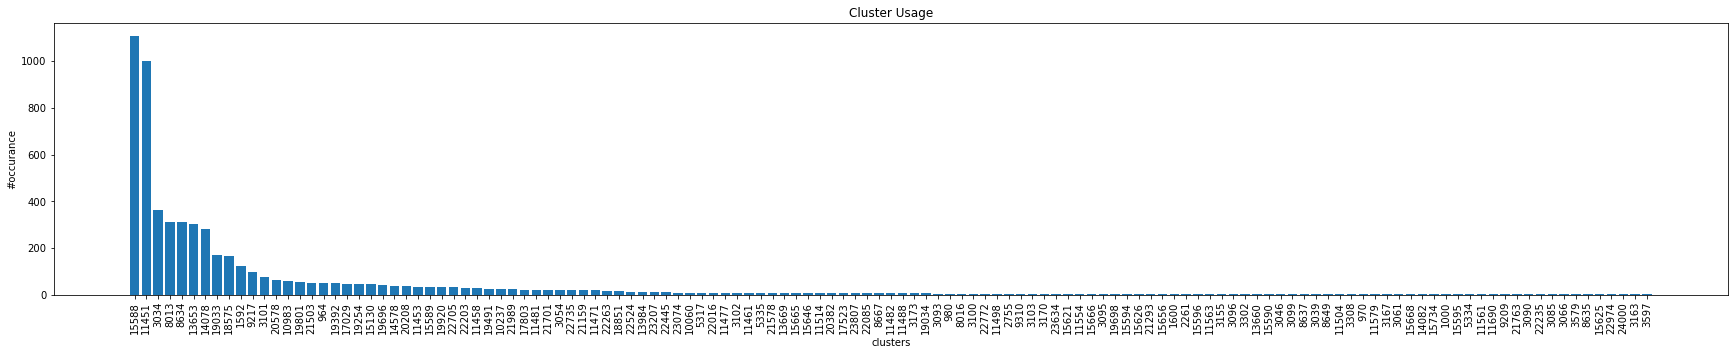

In [64]:
plt.figure(figsize=(30, 5))
plt.bar(np.arange(len(clusters)), [c for i, c in clusters])
plt.title('Cluster Usage')
plt.xticks(np.arange(len(clusters)), [str(i) for i, c in clusters], rotation=90)
plt.xlabel("clusters")
plt.ylabel("#occurance")
plt.savefig('occurance.png')
plt.show()